In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [2]:
fao = pd.read_csv('FAO.csv', encoding= 'unicode_escape')

In [3]:
# 1(a)
overall_annual_food_production = fao.groupby("Area").sum().astype(int)
overall_annual_food_production.to_csv('overall_annual_food_production.csv')

In [4]:
#1(b)
overall_food_production = overall_annual_food_production.sum(axis=1).rename('OPC')

In [5]:
#1(c)
average_food_production = overall_annual_food_production.mean(axis=1).astype(int).rename('APPYPC')

In [6]:
#1(d)
overall_food_production_sum = overall_food_production.sum()
percentage_food_production = (overall_food_production.rename('GAPPC')/overall_food_production_sum * 100).round(3).astype(str) + '%'

In [7]:
overall_and_average_and_percentage_food_production = pd.concat([overall_food_production,
                                                               average_food_production,
                                                               percentage_food_production],
                                                               axis=1)
print(overall_and_average_and_percentage_food_production.head(3).append(overall_and_average_and_percentage_food_production.tail(3)).to_string())

                 OPC  APPYPC   GAPPC
Area                                
Afghanistan   689162   13003  0.182%
Albania       237202    4475  0.063%
Algeria      1530613   28879  0.404%
Yemen         459785    8675  0.121%
Zambia        315687    5956  0.083%
Zimbabwe      351093    6624  0.093%


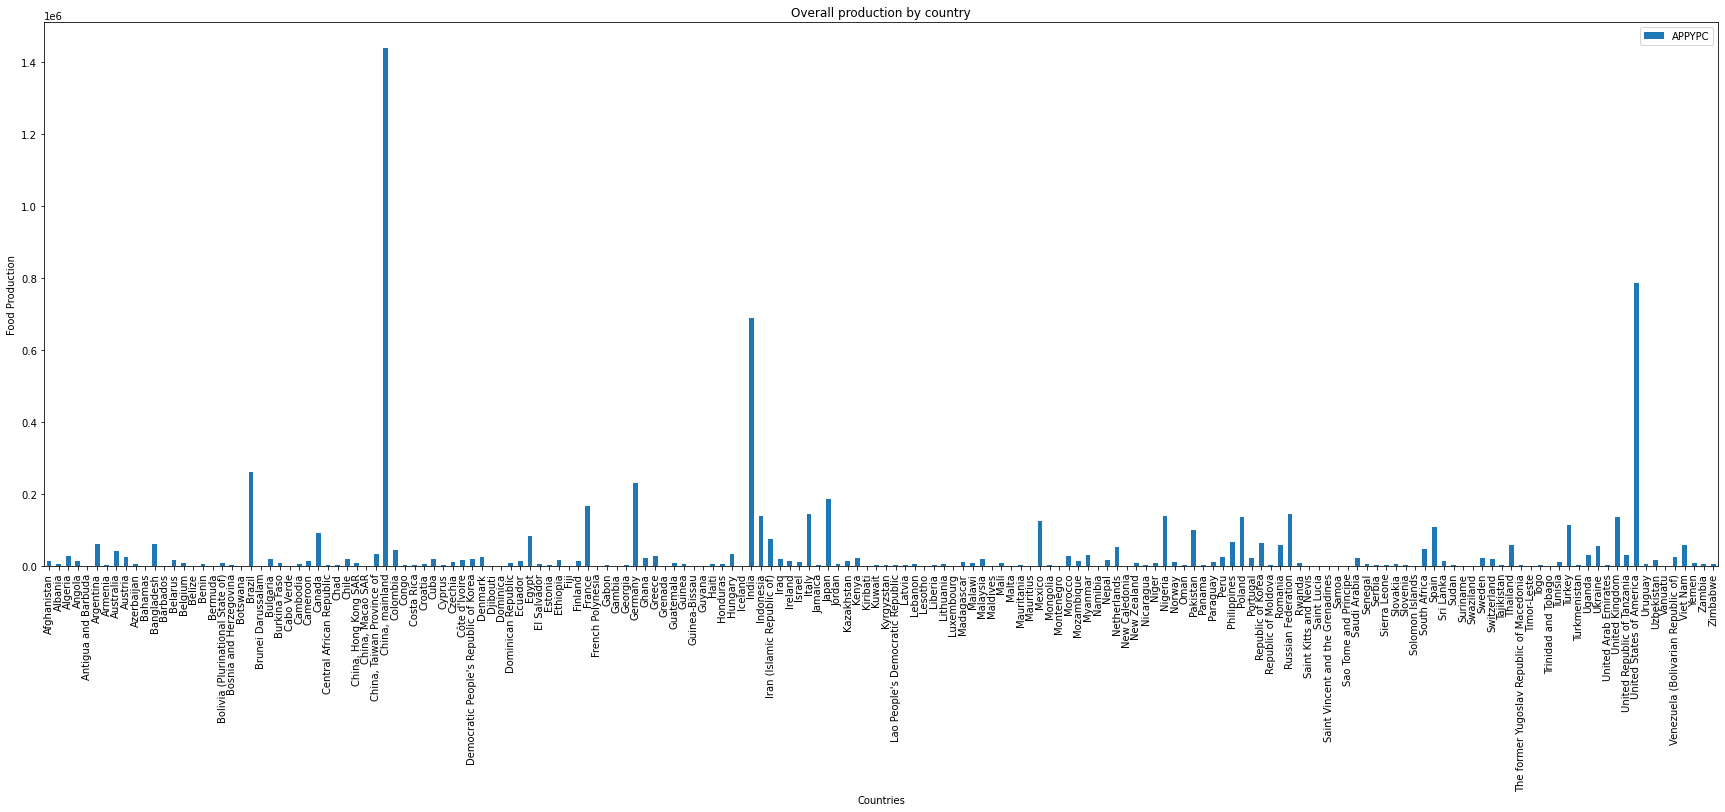

In [25]:
# 2
ax = overall_and_average_and_percentage_food_production['APPYPC'].plot(kind='bar', figsize=(30,10), title='Overall production by country', legend=True)
ax.set_xlabel('Countries')
ax.set_ylabel('Food Production')
# max_val = overall_and_average_and_percentage_food_production['APPYPC'].idxmax()
# min_val = overall_and_average_and_percentage_food_production['APPYPC'].idxmin()
plt.show()